## 符号攻击图像抽取

In [1]:
import os, sys
import torch
sys.path.append('../data/')
sys.path.append("../")
from load_cifar import load_cifar
from load_olivetti import load_olivetti
from resnet import resnet
from preact_resnet import PreActResNet18
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
def sgn_pictures(net,path):
    net.load_state_dict(torch.load(path))
    params = [p for p in net.parameters() if p.requires_grad]
    params = torch.cat([p.flatten() for p in params if p.ndimension()>1])
    print(params.shape)
    bits = np.sign(params[:8*32*32*8].detach().cpu().numpy())
    bits[bits == -1] = 0
    bits = bits.astype(np.uint8)
    imgs = np.packbits(bits.reshape(-1,8)).reshape(8, 32, 32)
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(imgs[i], cmap='gray')
        plt.axis('off')

torch.Size([461872])


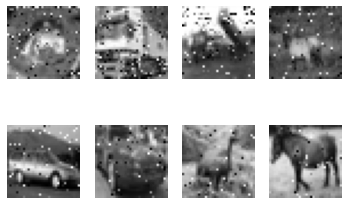

In [21]:
net = resnet(num_classes=10)
sgn_pictures(net, 'ckpts/cifar_sgn_res5_32.0_model.ckpt')

torch.Size([463792])


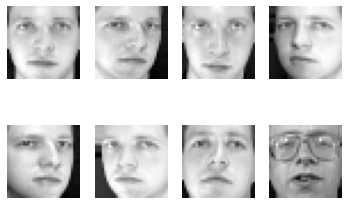

In [22]:
net = resnet(num_classes=40)
sgn_pictures(net, 'ckpts/olivetti_sgn_resnet_1024.0_model.ckpt')